- 상담직원을 효과적으로 관리하려는 목적 하에 clustering 시도
- DBScan이 성능이 좋다는 이야기는 들었으나, 모델에 대한 이해 부족으로 kmeans로 clustering
- 실제 도입 가능성이 높다고 판단되었으나 (C&D 선경) 다른 분석 니즈가 급하게 생겨서 중단

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

In [26]:
rd = pd.read_excel('tmp.xlsx')
rd.head()

,Unnamed: 0,name,id,tenure,wh16,wh20,wh28,wh32,wh40,calls,outbounds,att,aht,cph,csat,nsales
0,NaN,최문정,MUCHO6,1,0,0,1,0,0,456,71,192,395,395,0.788235,19
1,NaN,권은경,EUKWO,1,0,1,0,0,0,260,36,278,408,408,0.884615,21
2,NaN,임민정,MILIM3,1,0,0,1,0,0,183,99,242,498,498,0.851852,14
3,NaN,박윤미,YOPAR3,1,0,1,0,0,0,150,72,299,652,652,0.916667,3
4,NaN,구현경,HYGOO,1,0,0,1,0,0,533,107,253,451,451,0.929577,11


In [34]:
testset = rd.iloc[:,1:]
testset.tail(10)

,name,id,tenure,wh16,wh20,wh28,wh32,wh40,calls,outbounds,att,aht,cph,csat,nsales
32,임규성,GYLIM,1,0,0,0,1,0,86,264,47,408,408,1.000000,20
33,김주영,JUKIM25,1,0,0,0,0,1,123,296,132,536,536,1.000000,5
34,신경호,KYSHI3,1,0,0,0,0,1,63,304,128,569,569,0.888889,29
35,이대성,DALEE2,0,0,0,0,1,0,412,147,222,762,762,NaN,1
36,김지혜,JIKIM19,0,0,0,0,0,1,372,173,250,753,753,NaN,2
37,홍자경,JAHON1,0,0,0,0,1,0,351,132,280,725,725,NaN,2
38,홍샛별,SAHON1,0,0,0,0,1,0,305,116,400,802,802,NaN,0
39,조현정,HYCHO20,0,0,0,1,0,0,245,82,254,621,621,NaN,1
40,정미애,MIJUN2,0,0,0,0,0,1,312,97,417,1111,1111,NaN,7
41,김민혁,MIKIM24,0,0,0,1,0,0,143,124,405,1203,1203,NaN,0


In [36]:
testset = testset.head(-7)
testset.tail()

,name,id,tenure,wh16,wh20,wh28,wh32,wh40,calls,outbounds,att,aht,cph,csat,nsales
30,장신영,SHCHA10,1,0,0,0,0,1,79,349,91,211,211,0.714286,41
31,이희인,HELEE3,1,0,0,0,1,0,70,225,135,740,740,1.000000,42
32,임규성,GYLIM,1,0,0,0,1,0,86,264,47,408,408,1.000000,20
33,김주영,JUKIM25,1,0,0,0,0,1,123,296,132,536,536,1.000000,5
34,신경호,KYSHI3,1,0,0,0,0,1,63,304,128,569,569,0.888889,29


In [93]:
# create model and prediction
model = DBSCAN(eps=0.3, min_samples=3)
predict = pd.DataFrame(model.fit_predict(prep.MinMaxScaler().fit_transform(testset.iloc[:,2:])))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([testset,predict],axis=1)
r.head()

,name,id,tenure,wh16,wh20,wh28,wh32,wh40,calls,outbounds,att,aht,cph,csat,nsales,predict
0,최문정,MUCHO6,1,0,0,1,0,0,456,71,192,395,395,0.788235,19,0
1,권은경,EUKWO,1,0,1,0,0,0,260,36,278,408,408,0.884615,21,-1
2,임민정,MILIM3,1,0,0,1,0,0,183,99,242,498,498,0.851852,14,-1
3,박윤미,YOPAR3,1,0,1,0,0,0,150,72,299,652,652,0.916667,3,-1
4,구현경,HYGOO,1,0,0,1,0,0,533,107,253,451,451,0.929577,11,-1


In [94]:
predict.describe()

,predict
count,35.000000
mean,-0.485714
std,0.981338
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-0.500000
max,2.000000


In [96]:
r.to_csv('test.csv')

___
### scaling 후

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [53]:
scaler = StandardScaler()
model = DBSCAN(eps=0.3, min_samples=3)
pipeline = make_pipeline(scaler,model)

In [58]:

predict = pd.DataFrame(pipeline.fit_predict(testset.iloc[:,2:]))

In [59]:
predict.describe()

,0
count,35.0
mean,-1.0
std,0.0
min,-1.0
25%,-1.0
50%,-1.0
75%,-1.0
max,-1.0


___
### - dbscan으로 작업 할 때 큰 효과를 보지 못함
### - 파라미터 설정에 오류를 범한 것으로 보임 (모델에 대한 이해 부족)
### - 추후 업데이트 필요
### - 당장은 kmeans 시도

In [61]:
from sklearn.cluster import KMeans

In [62]:
scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model)

In [63]:
pipeline.fit(testset.iloc[:,2:])

predict = pd.DataFrame(pipeline.predict(testset.iloc[:,2:]))

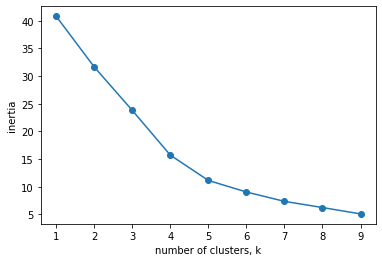

In [91]:
ks = range(1,10)

inertias = []



for k in ks:

    model = KMeans(n_clusters=k)

    model.fit(prep.MinMaxScaler().fit_transform(testset.iloc[:,2:]))

    inertias.append(model.inertia_)

    

# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show()



- scaling 없이

In [77]:
import sklearn.preprocessing as prep

In [90]:
prep.MinMaxScaler().fit_transform(testset.iloc[:,2:])

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.70597738, 0.14197531, 0.41666667, 0.34782609,
        0.34782609, 0.36470588, 0.30769231],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.38933764, 0.03395062, 0.6637931 , 0.37240076,
        0.37240076, 0.65384615, 0.34615385],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.26494346, 0.22839506, 0.56034483, 0.54253308,
        0.54253308, 0.55555556, 0.21153846],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.21163166, 0.14506173, 0.72413793, 0.83364839,
        0.83364839, 0.75      , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.83037157, 0.25308642, 0.59195402, 0.4536862 ,
        0.4536862 , 0.78873239, 0.15384615],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.42164

In [75]:
StandardScaler(s)

StandardScaler(copy=0     456
1     260
2     183
3     150
4     533
5     280
6     146
7     177
8     182
9     158
10    360
11    272
12    274
13    331
14    220
15    490
16    461
17    570
18    638
19    249
20    228
21    443
22    334
23    474
24    467
25    312
26    359
27    298
28    356
29     19
30     79
31     70
32     86
33    123
34     63
Name: calls, dtype: int64,
               with_mean=True, with_std=True)